$${\color{yellow}{\text{Applied Linear Algebra: Vectors and Matrices}}}$$



---

Restart the session after executing the following cell

---

In [2]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 37.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 62.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 10.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.1
    Uninstalling scipy-1.16.1:
      Successfully uninstalled scipy-1.16.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
opencv-python 4

In [2]:
!pip install yfinance

---

Load essential libraries

---

In [3]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
plt.style.use('dark_background')
%matplotlib inline
import sys
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
import nltk
import gensim.downloader
from nltk.tokenize import word_tokenize
import yfinance as yf
import seaborn as sns

---

Mount Google Drive folder if running Google Colab

---

In [ ]:
## Mount Google drive folder if running in Colab
if('google.colab' in sys.modules):
    from google.colab import drive
    drive.mount('/content/drive', force_remount = True)
    DIR = '/content/drive/MyDrive/Colab Notebooks/AIML'
    DATA_DIR = DIR+'/Data/'
else:
    DATA_DIR = 'Data/'

Mounted at /content/drive


---

**We will now use Pytorch to create tensors**

The patient data matrix:

![patient data matrix](https://1drv.ms/i/s!AjTcbXuSD3I3hsxIkL4V93-CGq8RkQ?embed=1&width=1000)

**Notation**:

Zeroth patient vector $\mathbf{x}^{(0)}= \begin{bmatrix}72\\120\\37.3\\104\\32.5\end{bmatrix}$ and zeroth feature (heart rate vector) $\mathbf{x}_0 = \begin{bmatrix}72\\85\\68\\90\\84\\78\end{bmatrix}.$

---



In [ ]:
## Create a patient data matrix as a constant tensor
X = torch.tensor([[72, 120, 37.3, 104, 32.5],
                  [85, 130, 37.0, 110, 14],
                  [68, 110, 38.5, 125, 34],
                  [90, 140, 38.0, 130, 26],
                  [84, 132, 38.3, 146, 30],
                  [78, 128, 37.2, 102, 12]])
print(X)
print(X.shape)
print(type(X))
print(X[0]) # this is patient-0 information which is a rank-1 tensor
print(X[0, :]) # patient-0 all features
print('------------')
print(X[0, 2]) # feature-2 of patient-0, temperature of patient-0
print(X[:, 2]) # feature-2 of all patients, temperature of all patients

tensor([[ 72.0000, 120.0000,  37.3000, 104.0000,  32.5000],
        [ 85.0000, 130.0000,  37.0000, 110.0000,  14.0000],
        [ 68.0000, 110.0000,  38.5000, 125.0000,  34.0000],
        [ 90.0000, 140.0000,  38.0000, 130.0000,  26.0000],
        [ 84.0000, 132.0000,  38.3000, 146.0000,  30.0000],
        [ 78.0000, 128.0000,  37.2000, 102.0000,  12.0000]])
torch.Size([6, 5])
<class 'torch.Tensor'>
tensor([ 72.0000, 120.0000,  37.3000, 104.0000,  32.5000])
tensor([ 72.0000, 120.0000,  37.3000, 104.0000,  32.5000])
------------
tensor(37.3000)
tensor([37.3000, 37.0000, 38.5000, 38.0000, 38.3000, 37.2000])


---

**Convert a PyTorch object into a numpy array**

---

In [ ]:
print(X.numpy())
print(type(X.numpy()))

---

**Addition and subtraction of vectors, scalar multiplication (apply operation componentwise)**

![vector addition](https://1drv.ms/i/c/37720f927b6ddc34/IQQ03G17kg9yIIA3NokBAAAAAZLAaAoWwhtn8Vk26NotALo?width=256)

![vector subtracton](https://1drv.ms/i/c/37720f927b6ddc34/IQQ03G17kg9yIIA3M4kBAAAAAU_n_mAEv006QFZm_sUj2Dc?width=256)

![vector multiplication](https://1drv.ms/i/c/37720f927b6ddc34/IQQ03G17kg9yIIA3NIkBAAAAAa_qL04bLT4kWoNeHcrR9LQ?width=256)

![vector geometry1](https://1drv.ms/i/c/37720f927b6ddc34/IQSGNMr5z3SSRry7LSKL7LybAcGYuzgw5smabV8-6DudXIs?width=230)

![vector geometry2](https://1drv.ms/i/c/37720f927b6ddc34/IQQ03G17kg9yIIA3WokBAAAAAQi8FPV9YCebl5WnyEKJ3vg?width=213&height=192)


---

In [ ]:
# Vector addition
print(X[1, :] + X[2, :])

# Vector subtraction
print(X[1, :] - X[2, :])

# Scalar-vector multiplication
print(X[:, 2])
print((9/5)*X[:, 2]+32) # 0peration not defined in pen & paper but in computation is referred to as
# broadcasting

# Average patient
x_avg = (1/6)*(X[0, :] + X[1, :] + X[2, :] + X[3, :] + X[4, :] + X[5, :])
x_avg = torch.mean(X, dim = 0) # dim = 0 means top-to-bottom or along dim-0

# Another broadcasting example
print(X)
print(x_avg)
print(X - x_avg)

---

Application of vector subtraction in natural language processing (NLP): download the word embedding model trained on Wikipedia articles.

---

In [ ]:
model = gensim.downloader.load('glove-wiki-gigaword-50')

[==================================================] 100.0% 66.0/66.0MB downloaded


---

Now we will see what embedding vector comes as a result of applying the model for the words *cricket* and *football*.

Next, we will do an *intuitive* subtraction of word embeddings as in

1. Cricket without Tendulkar
2. Football without Messi

Note that the embedding vectors have 50 components corresponding to the 50-dimensional embedding of model suggested by the name '**glove-wiki-gigaword-50**'

---

In [ ]:
# Cricket without Tendulkar
a = model['cricket'] - model['tendulkar']

# Football without Messi
b = model['football'] - model['messi']
print(a)
print(b)

# How different is cricket-without-tendulkar from
# football-without-messi?
print(a-b)

[-0.7716      0.41267997 -1.725968   -0.10445005 -1.1475699  -0.854661
 -1.089      -0.08342999  0.62349    -1.67822    -0.2488078  -0.49199998
  0.18756002 -1.67098     0.6117872   0.42784432  1.05656     0.91583097
 -0.03299999 -0.04422501  0.200326   -0.33737004  0.31068     1.37842
 -1.13689    -0.57445    -0.70685995  0.41552    -0.28937     0.54485
  1.0492998   0.62732    -0.8105     -1.27723    -0.02612001  0.53963
 -0.14065999 -0.738244   -0.30487    -1.18129     0.05651999 -0.993618
 -0.911399   -0.09289992  0.535432    0.26259995 -0.63031     0.64473
  0.77843     0.15099996]
[-2.06898     0.66804904 -1.077512    0.79964995 -0.27109998 -0.26289004
 -0.881       0.377503   -0.10869002 -2.47329    -0.23453003 -0.58438
  0.10404003 -0.52671003 -0.03030002  0.237764    0.19168997  1.60344
 -0.42980003  0.59058     0.59800005 -0.67075     0.45888     1.4538
 -1.15642    -1.63534    -1.1248189  -0.20879    -0.00812     0.25545004
  1.92044     0.30049008  0.19949001 -0.675167   -0

---

Understanding pen & paper versions of tensors w.r.t. their representations in the code

---

In [ ]:
# Pen & paper: 3-vector, Code: rank-1 tensor
a_vector = torch.tensor([1.0, 2.0, 3.0], dtype = torch.float64)
print(a_vector)
print(a_vector.shape)
print('-------')
# Pen & paper: 1x3-matrix, Code: rank-2 tensor
a_matrix_version1 = torch.tensor([[1.0, 2.0, 3.0]], dtype = torch.float64)
print(a_matrix_version1)
print(a_matrix_version1.shape)
# Pen & paper: 3x1-matrix, Code: rank-2 tensor
a_matrix_version2 = torch.tensor([[1.0], [2.0], [3.0]], dtype = torch.float64)
print(a_matrix_version2)
print(a_matrix_version2.shape)

tensor([1., 2., 3.], dtype=torch.float64)
torch.Size([3])
-------
tensor([[1., 2., 3.]], dtype=torch.float64)
torch.Size([1, 3])
tensor([[1.],
        [2.],
        [3.]], dtype=torch.float64)
torch.Size([3, 1])


---

A tensor of rank 3 corresponding to 4 time stamps (hourly), 3 samples (patients), 2 features (HR and BP). Assume that admission time is 9AM.

---

In [ ]:
# A rank-3 patient tensor with shape (4, 3, 2)
# with meaning for
# dim-0 as 4 hourly timestamps,
# dim-1 as 3 patients, and
# dim-2 as 2 features (HR and BP)
# T = torch.tensor([[[HR, BP], [HR, BP], [HR, BP]],
#                   [[HR, BP], [HR, BP], [HR, BP]],
#                   [[HR, BP], [HR, BP], [HR, BP]],
#                   [[HR, BP], [HR, BP], [HR, BP]]])
T = torch.tensor([[[74., 128], [79, 116], [71, 116]],
                 [[78, 118], [82, 124], [72, 128]],
                 [[84, 138], [84, 130], [74, 120]],
                 [[82, 126], [76, 156], [82, 132]]])
print(T)

tensor([[[ 74., 128.],
         [ 79., 116.],
         [ 71., 116.]],

        [[ 78., 118.],
         [ 82., 124.],
         [ 72., 128.]],

        [[ 84., 138.],
         [ 84., 130.],
         [ 74., 120.]],

        [[ 82., 126.],
         [ 76., 156.],
         [ 82., 132.]]])


---

**Accessing elements of a tensor**

---

In [ ]:
## Accessing elements of a tensor
# Rank-3 tensor T has axes order (timestamps, patients, features)

# Element of T at postion 3 w.r.t. dim-0, position 2 w.r.t. dim-1,
# position-1 w.r.t dim-2
print(T[3, 2, 1]) # BP of patient-2 at noon


# Element-0 of object T which is also the info for all patients at
# admission time 9AM
print(T[0]) # patients' info at admission time
print(T[-1]) # first element of T from the tail, patients' info at noon


# Patient-2 info at noon
T[-1, 2]


tensor(132.)
tensor([[ 74., 128.],
        [ 79., 116.],
        [ 71., 116.]])
tensor([[ 82., 126.],
        [ 76., 156.],
        [ 82., 132.]])


tensor([ 82., 132.])

---

Understanding shapes

---

In [ ]:
#a = torch.tensor([1.0, 2.0, 3.0])
#a = torch.tensor([[1.0, 2.0, 3.0]])
a = torch.tensor([[[1.0, 2.0, 3.0]]])
print(a)
print(a.shape)

tensor([[[1., 2., 3.]]])
torch.Size([1, 1, 3])


---

**Broadcasting**

---

In [ ]:
# A simple broadcasting example
a = torch.tensor([1.0, 2.0, 3.0])
b = torch.tensor([4.0])
print(a.shape)
print(b.shape)
print(a-b)

torch.Size([3])
torch.Size([1])
tensor([-3., -2., -1.])


In [ ]:
# How to add a new axis to a tensor using the unsqueeze() function
#print(T)
#print(T.shape)
T_patient0 = T[:, 0, :]
print(T_patient0)
print(T_patient0.shape)
print('---------')
T_patient0_new = torch.unsqueeze(T_patient0, 1)
print(T_patient0_new)
print(T_patient0_new.shape)
print('---------')
print(T)
print(T.shape)

tensor([[ 74., 128.],
        [ 78., 118.],
        [ 84., 138.],
        [ 82., 126.]])
torch.Size([4, 2])
---------
tensor([[[ 74., 128.]],

        [[ 78., 118.]],

        [[ 84., 138.]],

        [[ 82., 126.]]])
torch.Size([4, 1, 2])
---------
tensor([[[ 74., 128.],
         [ 79., 116.],
         [ 71., 116.]],

        [[ 78., 118.],
         [ 82., 124.],
         [ 72., 128.]],

        [[ 84., 138.],
         [ 84., 130.],
         [ 74., 120.]],

        [[ 82., 126.],
         [ 76., 156.],
         [ 82., 132.]]])
torch.Size([4, 3, 2])


In [ ]:
# How different are the patients from patient-0?
#T - T_patient0 # does not work for broadcasting
#T - T_patient0

# How different are the patients compared to their time at admission
T-T_patient0_new

tensor([[[  0.,   0.],
         [  5., -12.],
         [ -3., -12.]],

        [[  0.,   0.],
         [  4.,   6.],
         [ -6.,  10.]],

        [[  0.,   0.],
         [  0.,  -8.],
         [-10., -18.]],

        [[  0.,   0.],
         [ -6.,  30.],
         [  0.,   6.]]])

---

**Exercise**: interpret $\texttt{T[:, -1, :]}$

---

In [ ]:
# Last patient's info at all timestamps
T[:, -1, :]

tensor([[ 71., 116.],
        [ 72., 128.],
        [ 74., 120.],
        [ 82., 132.]])

---

Broadcasting exercise

---

In [ ]:
T = torch.randint(-5, 6, (4, 5, 3))
print(T)
v = torch.tensor([1.0, 2.0, 3.0])
print(v)

tensor([[[-5,  3,  5],
         [ 0,  1,  5],
         [-2, -1,  1],
         [ 1, -5,  3],
         [ 3, -1,  1]],

        [[ 2, -1,  3],
         [-4, -5, -3],
         [ 3, -1, -5],
         [ 5,  4, -3],
         [-1, -3, -2]],

        [[-5, -5,  1],
         [ 4, -3, -5],
         [ 3, -4,  5],
         [-2,  2,  0],
         [ 2,  1,  5]],

        [[ 5, -3, -3],
         [ 2,  5,  1],
         [-4, -1, -3],
         [ 3,  3, -3],
         [-3,  4,  3]]])
tensor([1., 2., 3.])


---

$l_2$ norm or the geometric length of a vector denoted as $\lVert \mathbf{a}\rVert$ tells us how long a vector is. In 2-dimensions, $$\mathbf{a}=\begin{bmatrix}a_1\\a_2\end{bmatrix}\Rightarrow \lVert\mathbf{a}\rVert_2 = \sqrt{a_1^2+a_2^2}$$ and in $n$-dimensions, $$\mathbf{a}=\begin{bmatrix}a_1\\a_2\\\vdots\\a_n\end{bmatrix}\Rightarrow\lVert \mathbf{a}\rVert_2 = \sqrt{a_1^2+a_2^2+\cdots+a_n^2}.$$

![vector norm](https://1drv.ms/i/c/37720f927b6ddc34/IQT817WmpQjlRqZ1R0d5Cfv6AUW6c4robL-gk06i9wmCaFU?width=500)

---

In [ ]:
## l2 norm of a vector
x = torch.tensor([76.0, 124.0], dtype = torch.float64)
print(x)
torch.norm(x)

tensor([ 76., 124.], dtype=torch.float64)


tensor(145.4373, dtype=torch.float64)


---

**Dot Product of Vectors**

A scalar resulting from an elementwise multiplication and addition: $$\mathbf{a}{\color{cyan}\cdot}\mathbf{b} = {\color{red}{a_1b_1}}+{\color{green}{a_2b_2}}+\cdots+{\color{magenta}{a_nb_n}}$$

The <font color="cyan">dot</font> ${\color{cyan}\cdot}$ represents the computation of the dot product.


---

In [ ]:
## Dot product of vectors
a = torch.tensor([1.0, 2.0, 3.0], dtype = torch.float64)
b = torch.tensor([4.0, 5.0, 6.0], dtype = torch.float64)
torch.dot(a, b)

tensor(32., dtype=torch.float64)

---

The dot product is a measure of similarity between vectors (or, how aligned they are geometrically).

![dot product](https://1drv.ms/i/c/37720f927b6ddc34/IQTbcGSjdbhSTJ7J39d5BCWAAWS6-y5U6J87vHuDWeAqGwM?width=6000)
---

In [ ]:
a = torch.tensor([1.0, 2.0])
b = torch.tensor([2.0, 4.0])
c = torch.tensor([-2.0, 1.0])
d = torch.tensor([-1.0, -2.0])
print(torch.dot(a, b))
print(torch.dot(a, c))
print(torch.dot(a, d))

tensor(10.)
tensor(0.)
tensor(-5.)


---

Cauchy-Schwarz inequality $-1\leq\frac{\mathbf{x}\cdot{\mathbf{y}}}{\lVert\mathbf{x}\rVert_2\lVert\mathbf{y}\rVert_2}\leq1.$

This is a normalized measure of similarity (or extent of alignment) between vectors.

Angle between vectors $\mathbf{x}$ and $\mathbf{y} = \cos^{-1}\left(\frac{\mathbf{x}\cdot{\mathbf{y}}}{\lVert\mathbf{x}\rVert_2\lVert\mathbf{y}\rVert_2}\right).$

![angle](https://1drv.ms/i/c/37720f927b6ddc34/IQQ03G17kg9yIIA3WokBAAAAAQi8FPV9YCebl5WnyEKJ3vg?width=213&height=400)


---

In [ ]:
x = torch.tensor([1.0, 2.0])
y = torch.tensor([2.0, 1.0])

# Linear difference between x and y
print(torch.norm(x - y))

# Angle difference between x and y in radians
print(torch.acos(torch.dot(x,y) / (torch.norm(x) * torch.norm(y))))

# Angle difference between x and y in degrees
print((180.0/torch.pi)*(torch.acos(torch.dot(x,y) / (torch.norm(x) * torch.norm(y)))))

tensor(1.4142)
tensor(0.6435)
tensor(36.8699)


---

Application of the Cauchy-Schwarz inequality: is "Cricket without Tendulkar" same as "Football without Messi"?

---

In [ ]:
a = torch.tensor(model['cricket'] - model['tendulkar'], dtype = torch.float64)
b = torch.tensor(model['football'] - model['messi'], dtype = torch.float64)

# Linear difference between and a and b
print(torch.norm(a-b))

# Angle difference between a and b in radians
print(torch.acos(torch.dot(a, b) / (torch.norm(a) * torch.norm(b))))

# Angle difference between a and b in degrees
print((180.0/torch.pi)*(torch.acos(torch.dot(a, b) / (torch.norm(a) * torch.norm(b)))))

tensor(4.2349, dtype=torch.float64)
tensor(0.7420, dtype=torch.float64)
tensor(42.5126, dtype=torch.float64)


In [ ]:
c = torch.tensor(model['soup'] - model['salt'], dtype = torch.float64)

# Angle difference between a and b in degrees
print((180.0/torch.pi)*(torch.acos(torch.dot(a, b) / (torch.norm(a) * torch.norm(b)))))

# Angle difference between a and c in degrees
print((180.0/torch.pi)*(torch.acos(torch.dot(a, c) / (torch.norm(a) * torch.norm(c)))))

# cricket-without-tendulkar has approximately the same similarity w.r.t.
# football-without-messi and tennis-without-federer

tensor(42.5126, dtype=torch.float64)
tensor(103.5210, dtype=torch.float64)



---

**Hadamard Product of Vectors**

A vector resulting from an elementwise multiplication: $$\mathbf{a}{\color{cyan}\otimes}\mathbf{b} = \begin{bmatrix}{\color{red}{a_1\times b_1}}\\{\color{green}{a_2\times b_2}}\\\vdots\\{\color{magenta}{a_n\times b_n}}\end{bmatrix}.$$

The <font color="cyan">$\otimes$</font> represents the computation of the Hadamard product.

---

In [ ]:
## Hadamard product
a = torch.tensor([1.0, 2.0, 3.0], dtype = torch.float64)
b = torch.tensor([4.0, 5.0, 6.0], dtype = torch.float64)

# Element-wise multiplication (Hadamard product)
print(a*b)
print(torch.mul(a, b))

tensor([ 4., 10., 18.], dtype=torch.float64)
tensor([ 4., 10., 18.], dtype=torch.float64)


---

A matrix-vector product is simply a sequence of dot products of the rows of the matrix (seen as vectors) with the vector

![matvec product](https://1drv.ms/i/c/37720f927b6ddc34/IQQ1cQ8fZdFmS4cnGkBlsZbAAaL2zMtzWdjHe-HCMt4UTA0?width=700)

---

In [ ]:
## Matrix-vector product
A = torch.tensor([[1.0, 2.0, 4.0],
                  [2.0, -1.0, 3.0]])
x = torch.tensor([4.0, 2.0, -2.0])

# Matrix-vector multiplication
print(torch.matmul(A, x))

tensor([0., 0.])


---

Here we create a simple sentence in English and tokenize it

---

In [ ]:
sentence = 'i swam quickly across the river to get to the other bank'
nltk.download('punkt_tab')


---

Generate the word embeddings for the tokens and store them in a matrix $\mathbf{X}$ such that each row of the matrix corresponds to a token.

---

---

A matrix-matrix product is simply a sequence of matrix-vector products.

![matmatprod](https://1drv.ms/i/c/37720f927b6ddc34/IQQ-B3z7tbWHQqBrW9k2ElDVAUc5fWzM24txLkgBK7f8Yac?width=550)


---

---

Matrix-matrix product using patient data matrix and a weights matrix:

![patient dataset](https://1drv.ms/i/s!AjTcbXuSD3I3hspfrgklysOtJMOjaA?embed=1&width=800)

$$\mathbf{Z} = \mathbf{XW}.$$

---

In [28]:
# Patients data matrix
X = torch.tensor([[72, 120, 37.3, 104, 32.5],
                 [85, 130, 37.0, 110, 14],
                 [68, 110, 38.5, 125, 34],
                 [90, 140, 38.0, 130, 26],
                 [84, 132, 38.3, 146, 30],
                 [78, 128, 37.2, 102, 12]], dtype = torch.float64)
print(f'Patient data matrix X:\n {X}') #f-string in Python

# Weights matrix
W = torch.tensor([[-0.1, 0.5, 0.3],
                  [0.9, 0.3, 0.5],
                  [-1.5, 0.4, 0.1],
                  [0.1, 0.1, -1.0],
                  [-1.2, 0.5, -0.8]], dtype = torch.float64)
print(f'Weights matrix:\n {W}')

# Raw scores matrix (matrix-matrix multiplication)
Z = torch.matmul(X, W)
print(f'Raw zcores matrix:\n {Z}')
# The raw scores are also referred to as the logits

Patient data matrix X:
 tensor([[ 72.0000, 120.0000,  37.3000, 104.0000,  32.5000],
        [ 85.0000, 130.0000,  37.0000, 110.0000,  14.0000],
        [ 68.0000, 110.0000,  38.5000, 125.0000,  34.0000],
        [ 90.0000, 140.0000,  38.0000, 130.0000,  26.0000],
        [ 84.0000, 132.0000,  38.3000, 146.0000,  30.0000],
        [ 78.0000, 128.0000,  37.2000, 102.0000,  12.0000]],
       dtype=torch.float64)
Weights matrix:
 tensor([[-0.1000,  0.5000,  0.3000],
        [ 0.9000,  0.3000,  0.5000],
        [-1.5000,  0.4000,  0.1000],
        [ 0.1000,  0.1000, -1.0000],
        [-1.2000,  0.5000, -0.8000]], dtype=torch.float64)
Raw zcores matrix:
 tensor([[ 16.2500, 113.5700, -44.6700],
        [ 47.2000, 114.3000, -27.0000],
        [  6.1500, 111.9000, -72.9500],
        [ 41.8000, 128.2000, -50.0000],
        [ 31.5500, 126.5200, -74.9700],
        [ 47.4000, 108.4800, -20.4800]], dtype=torch.float64)


---

**Version-1** view of the matrix-matrix product $\mathbf{Z} = \mathbf{XW}$:

*What a particular neuron understands about a particular patient.*

![matrix-matrix product version-1](https://1drv.ms/i/c/37720f927b6ddc34/IQQdAOCwtndURKA-h4yvpTqlAYjBjlcweRSeMYkPvf7dwmQ?width=660)

$$\begin{align*}[\mathbf{Z}]_{i,j} &= (i,j)\text{-th element of }\mathbf{Z}\\&=\text{what the }j\text{th neuron learns about the } i\text{th patient}\\&=\mathbf{x}^{(i)}\cdot\mathbf{w}_j\\& = {\mathbf{x}^{(i)}}^\mathrm{T}\mathbf{w}_j\\\Rightarrow \underbrace{[\mathbf{Z}]_{{\color{yellow}0},{\color{cyan}2}}}_{{\color{yellow}0}\text{th patient},\,{\color{cyan}2}\text{nd neuron}} &= \mathbf{x}^{({\color{yellow}0})}\cdot\mathbf{w}_{{\color{cyan}2}}\\ &= \begin{bmatrix}72\\120\\37.3\\104\\32.5\end{bmatrix}\cdot\begin{bmatrix}0.3\\0.5\\0.1\\-1.0\\-0.8\end{bmatrix}\\ &= -44.67.\end{align*}$$

---

In [ ]:
## The (0, 2)-th element of the matrix-matrix product XW
torch.dot(X[0, :], W[:, 2])
#torch.matmul(X[0, :], W[:, 2]) (not recommended)

tensor(-44.6700, dtype=torch.float64)

---

**Version-2** view of the matrix-matrix product $\mathbf{Z} = \mathbf{XW}$:

*What a particular neuron understands about all the patients.*

![matrix-matrix product version-2](https://1drv.ms/i/c/37720f927b6ddc34/IQRm1-w-6TG0R4C4J4BizyzyAWIbcHzbEjgmx-0JFREdHsE?width=660)

$$\begin{align*}\mathbf{z}_j &= \mathbf{X}\mathbf{w}_j\\&=\text{what the } j\text{th neuron learns about the all the patients}\\&=w_{j,0}\times\textbf{HR}+w_{j,1}\times\textbf{BP}+w_{j,2}\times\textbf{Temp}+w_{j,3}\times\textbf{Sugar}+w_{j,4}\times\textbf{Vitamin D}\\&= w_{j,0}\mathbf{x}_0+w_{j,1}\mathbf{x}_1+w_{j,2}\mathbf{x}_2+w_{j,3}\mathbf{x}_3+w_{j,4}\mathbf{x}_4\\\Rightarrow\underbrace{\mathbf{z}_{{\color{cyan}0}}}_{{\color{cyan}0}\text{th neuron understanding}} &= \underbrace{\mathbf{X}}_{\color{yellow}{\text{all patients}}}\ \underbrace{\mathbf{w}_{{\color{cyan}0}}}_{{\color{cyan}0}\text{th neuron weights}}\\&= {\color{cyan}{-0.1}}\times\begin{bmatrix}{\color{yellow}{72}}\\{\color{yellow}{85}}\\{\color{yellow}{68}}\\{\color{yellow}{90}}\\{\color{yellow}{84}}\\{\color{yellow}{78}}\end{bmatrix}+{\color{cyan}{0.9}}\times\begin{bmatrix}{\color{yellow}{120}}\\{\color{yellow}{130}}\\{\color{yellow}{110}}\\{\color{yellow}{140}}\\{\color{yellow}{132}}\\{\color{yellow}{128}}\end{bmatrix}+({\color{cyan}{-1.5}})\times\begin{bmatrix}{\color{yellow}{37.3}}\\{\color{yellow}{37.0}}\\{\color{yellow}{38.5}}\\{\color{yellow}{38.0}}\\{\color{yellow}{38.3}}\\{\color{yellow}{37.2}}\end{bmatrix}+{\color{cyan}{0.1}}\times\begin{bmatrix}{\color{yellow}{104}}\\{\color{yellow}{110}}\\{\color{yellow}{125}}\\{\color{yellow}{130}}\\{\color{yellow}{146}}\\{\color{yellow}{102}}\end{bmatrix}+({\color{cyan}{-1.2}})\times\begin{bmatrix}{\color{yellow}{32.5}}\\{\color{yellow}{14}}\\{\color{yellow}{34}}\\{\color{yellow}{26}}\\{\color{yellow}{30}}\\{\color{yellow}{12}}\end{bmatrix}\\&=\begin{bmatrix}16.25\\47.20\\6.15\\41.80\\31.55\\47.40\end{bmatrix}.\end{align*}$$



---

In [ ]:
## The 0-th column of the matrix-matrix product XW
torch.matmul(X, W[:, 0])

tensor([16.2500, 47.2000,  6.1500, 41.8000, 31.5500, 47.4000],
       dtype=torch.float64)

---

**Version-3** view of the matrix-matrix product $\mathbf{Z} = \mathbf{XW}$:

*What all neurons understand about a particular patient.*

![matrix-matrix product version-3](https://1drv.ms/i/c/37720f927b6ddc34/IQRfO-qEJQ9mQYLH_f-lyjeQAaWV4FrDjTjaEHJpPB1PmCg?width=660)

$$\begin{align*}{\mathbf{z}^{(i)}}^\mathrm{T}&={\mathbf{x}^{(i)}}^\mathrm{T}\mathbf{W}\\&= \text{what is learned about the }i\text{th patient by all the neurons}\\&=i\text{th HR }\times{\mathbf{w}^{(0)}}^\mathrm{T}+i\text{th BP }\times{\mathbf{w}^{(1)}}^\mathrm{T}+i\text{th Temp }\times{\mathbf{w}^{(2)}}^\mathrm{T}+i\text{th Sugar }\times{\mathbf{w}^{(3)}}^\mathrm{T}+i\text{th Vitamin D }\times{\mathbf{w}^{(4)}}^\mathrm{T}\\&=x^{(i)}_0\times{\mathbf{w}^{(0)}}^\mathrm{T}+x^{(i)}_1\times{\mathbf{w}^{(1)}}^\mathrm{T}+x^{(i)}_2\times{\mathbf{w}^{(2)}}^\mathrm{T}+x^{(i)}_3\times{\mathbf{w}^{(3)}}^\mathrm{T}+x^{(i)}_4\times{\mathbf{w}^{(4)}}^\mathrm{T}\\\underbrace{\Rightarrow{{\mathbf{z}^{({\color{yellow}0})}}^\mathrm{T}}}_{{\color{yellow}{0}}\text{th patient understanding}}&=\underbrace{{{\mathbf{x}^{({\color{yellow}0})}}^\mathrm{T}}}_{{\color{yellow}{0}}\text{th patient}}\ \underbrace{\mathbf{W}}_{{\color{cyan}{\text{all neurons}}}}\\ &= {\color{yellow}{72}}\times\begin{bmatrix}{\color{cyan}{-0.1}} & {\color{cyan}{0.5}} & {\color{cyan}{0.3}}\end{bmatrix} \\&+ {\color{yellow}{120}}\times\begin{bmatrix}{\color{cyan}{0.9}} & {\color{cyan}{0.3}} & {\color{cyan}{0.5}}\end{bmatrix}\\&+{\color{yellow}{37.3}}\times\begin{bmatrix}{\color{cyan}{-1.5}} & {\color{cyan}{0.4}} & {\color{cyan}{0.1}}\end{bmatrix}\\&+{\color{yellow}{104}}\times\begin{bmatrix}{\color{cyan}{0.1}} & {\color{cyan}{0.1}} & {\color{cyan}{-1.0}}\end{bmatrix}\\&+{\color{yellow}{32.5}}\times\begin{bmatrix}{\color{cyan}{-1.2}} & {\color{cyan}{0.5}} & {\color{cyan}{-0.8}}\end{bmatrix}\\&=\begin{bmatrix}16.25 & 113.57 & 7.33\end{bmatrix}.\end{align*}$$


---

In [ ]:
Z

tensor([[ 16.2500, 113.5700, -44.6700],
        [ 47.2000, 114.3000, -27.0000],
        [  6.1500, 111.9000, -72.9500],
        [ 41.8000, 128.2000, -50.0000],
        [ 31.5500, 126.5200, -74.9700],
        [ 47.4000, 108.4800, -20.4800]], dtype=torch.float64)

In [ ]:
## The 0-th row of the matrix-matrix product XW
torch.matmul(X[0, :], W)

tensor([ 16.2500, 113.5700, -44.6700], dtype=torch.float64)

---

The similarity between each pair of words represented in the word embeddings matrix $\mathbf{X}_\mathrm{word}$ is the matrix-matrix product $\mathbf{X}_\mathrm{word}\mathbf{X}_\mathrm{word}^\mathrm{T}.$

---

---

The softmax function: takes a $k$-vector $\mathbf{z}$ as input and returns a vector $\mathbf{a}$ of the same shape as the output which is referred to as the softmax-activated scores.

$\begin{align*}\mathbf{a}&=\text{softmax}(\mathbf{z})=\begin{bmatrix}\dfrac{e^{z_1}}{e^{z_1}+e^{z_2}+\cdots+e^{z_k}}\\\dfrac{e^{z_2}}{e^{z_1}+e^{z_2}+\cdots+e^{z_k}}\\\vdots\\\dfrac{e^{z_k}}{e^{z_1}+e^{z_2}+\cdots+e^{z_k}}\end{bmatrix}.\end{align*}$

In the following example, we consider a raw scores vector $\mathbf{z}$ with 3 components which leads to the softmax-activated scores vectors $\mathbf{a}$ which can be interpreted as the predicted probabilities that the sample belongs to each one of the output classes:

![softmax](https://1drv.ms/i/s!AjTcbXuSD3I3hscmdol7J2G4GDo5WQ?embed=1&width=660)


---

In [ ]:
z = torch.tensor([1.0, 2.0, 3.0], dtype = torch.float64)
print(z)
softmax = torch.nn.Softmax(dim = 0)
a = softmax(z)
print(a)
print(torch.sum(a))

tensor([1., 2., 3.], dtype=torch.float64)
tensor([0.0900, 0.2447, 0.6652], dtype=torch.float64)
tensor(1.0000, dtype=torch.float64)


In [ ]:
# Raw scores matrix (matrix-matrix multiplication)
Z = torch.matmul(X, W)
print(f'Raw zcores matrix:\n {Z}')

# Calculate the softmax scores
softmax = torch.nn.Softmax(dim = 1)
A = softmax(Z)
print(f'Softmax scores matrix:\n {A}')

Raw zcores matrix:
 tensor([[ 16.2500, 113.5700, -44.6700],
        [ 47.2000, 114.3000, -27.0000],
        [  6.1500, 111.9000, -72.9500],
        [ 41.8000, 128.2000, -50.0000],
        [ 31.5500, 126.5200, -74.9700],
        [ 47.4000, 108.4800, -20.4800]], dtype=torch.float64)
Softmax scores matrix:
 tensor([[5.4258e-43, 1.0000e+00, 1.8934e-69],
        [7.2250e-30, 1.0000e+00, 4.3071e-62],
        [1.1840e-46, 1.0000e+00, 5.2561e-81],
        [2.9989e-38, 1.0000e+00, 4.0618e-78],
        [5.6892e-42, 1.0000e+00, 3.1189e-88],
        [2.9737e-27, 1.0000e+00, 9.8488e-57]], dtype=torch.float64)


---

Standardization of data to get rid of the effects of units.

The standard deviation of a vector is a measure of how much the components or elements of that vector typically deviate from their average value. For an $n$-vector $\mathbf{x},$ the standard deviation is denoted and calculated as
<p class="fragment">$$\text{std}(\mathbf{x}) = \sqrt{\frac{\left[x_1-\text{avg}(\mathbf{x})\right]^2+\cdots+\left[x_n-\text{avg}(\mathbf{x})\right]^2}{n}}.$$ The quantity inside the square root above is the average squared deviation which is also called the variance denoted as $$\text{var}(\mathbf{x}) = \frac{\left[x_1-\text{avg}(\mathbf{x})\right]^2+\cdots+\left[x_n-\text{avg}(\mathbf{x})\right]^2}{n}.$$

This means $\text{std}(\mathbf{x}) = \sqrt{\text{var}(\mathbf{x})}.$

A large standard deviation indicates that the components of the vector typically deviate a lot from their average value or mean.

The following component plot a vector of heart rate values has the 1-standard deviation above and below the mean represented as red-dotted lines:

![standard deviation](https://1drv.ms/i/c/37720f927b6ddc34/IQQB_uF-TUO8SpoodLWz7sQPAc4POmYfY3hPjlX3vpYfKlY?width=540)

---

In [29]:
# Heart rate vector
a = X[:, 0]
print(f'Heart rate vector:\n {a}')

# BP vector
b = X[:, 1]
#print(f'Blood pressure vector:\n {b}')

# Average heart rate
print(f'Average heart rate: {torch.mean(a)}')

# Average BP
#print(torch.mean(b))

# Mean-centered heart rate vector or the de-meaned heart rate vector or the
# deviations in heart rate vectors
a_mc = a - torch.mean(a)
print(f'Deviations in heart rate vector:\n {a_mc}')

# The average of the components of the mean-centered heart rate vector is zero
#print(torch.mean(a_mc))

# The squared deviations vector
print(f'Squared-deviations in heart rate vector:\n {a_mc**2}')

# The average of the squared deviations vector a.k.a. the variance in
# the heart rate
v = torch.mean(a_mc**2)
print(f'Average squared deviation or variance in the heart rate: {v}')

# Square-root of the average of the squared deviations vector
# which is the same as the square root of the variance a.k.a. the
# standard deviation in the heart rate
s = torch.sqrt(v)
print(f'Standard deviation of the heart rate: {s}')

# Standardized heart rate vector a.k.a. the z-scores of the heart rate is
# obtained by subtracting the mean heart rate and dividing by the
# deviation of the heart rates
z = a_mc / s #same as (a-np.mean(a)) / np.std(a)
print(f'Standardized heart rate vector:\n{z}')

Heart rate vector:
 tensor([72., 85., 68., 90., 84., 78.], dtype=torch.float64)
Average heart rate: 79.5
Deviations in heart rate vector:
 tensor([ -7.5000,   5.5000, -11.5000,  10.5000,   4.5000,  -1.5000],
       dtype=torch.float64)
Squared-deviations in heart rate vector:
 tensor([ 56.2500,  30.2500, 132.2500, 110.2500,  20.2500,   2.2500],
       dtype=torch.float64)
Average squared deviation or variance in the heart rate: 58.583333333333336
Standard deviation of the heart rate: 7.65397500213669
Standardized heart rate vector:
tensor([-0.9799,  0.7186, -1.5025,  1.3718,  0.5879, -0.1960],
       dtype=torch.float64)


---

Suppose heart rate is measured in beats per hour instead of beats per minute. How do the z-scores look like now?

---

In [30]:
# Suppose heart rate is measured in beats per hour instead of beats per minute
a = X[:, 0]*60
print(f'Heart rate vector:\n {a}')

# BP vector
b = X[:, 1]
#print(f'Blood pressure vector:\n {b}')

# Average heart rate
print(f'Average heart rate: {torch.mean(a)}')

# Average BP
#print(torch.mean(b))

# Mean-centered heart rate vector or the de-meaned heart rate vector or the
# deviations in heart rate vectors
a_mc = a - torch.mean(a)
print(f'Deviations in heart rate vector:\n {a_mc}')

# The average of the components of the mean-centered heart rate vector is zero
#print(torch.mean(a_mc))

# The squared deviations vector
print(f'Squared-deviations in heart rate vector:\n {a_mc**2}')

# The average of the squared deviations vector a.k.a. the variance in
# the heart rate
v = torch.mean(a_mc**2)
print(f'Average squared deviation or variance in the heart rate: {v}')

# Square-root of the average of the squared deviations vector
# which is the same as the square root of the variance a.k.a. the
# standard deviation in the heart rate
s = torch.sqrt(v)
print(f'Standard deviation of the heart rate: {s}')

# Standardized heart rate vector a.k.a. the z-scores of the heart rate
z = a_mc / s
print(f'Standardized heart rate vector:\n{z}')
# The z-scores are the same as before when the heart rate was in beats per minute

Heart rate vector:
 tensor([4320., 5100., 4080., 5400., 5040., 4680.], dtype=torch.float64)
Average heart rate: 4770.0
Deviations in heart rate vector:
 tensor([-450.,  330., -690.,  630.,  270.,  -90.], dtype=torch.float64)
Squared-deviations in heart rate vector:
 tensor([202500., 108900., 476100., 396900.,  72900.,   8100.],
       dtype=torch.float64)
Average squared deviation or variance in the heart rate: 210900.0
Standard deviation of the heart rate: 459.23850012820134
Standardized heart rate vector:
tensor([-0.9799,  0.7186, -1.5025,  1.3718,  0.5879, -0.1960],
       dtype=torch.float64)


---

One-hot encoding of the true output labels


![patient dataset](https://1drv.ms/i/s!AjTcbXuSD3I3hspfrgklysOtJMOjaA?embed=1&width=800)

---

In [31]:
# The following does not work in PyTorch
#y = torch.tensor(['non-diabetic', 'diabetic'])

# Create a 1D-numpy array of output labels (equivalent to a rank-1 tensor in
# PyTorch which itself is equivalent to a vector in pen & paper)
y = np.array(['non-diabetic',
              'diabetic',
              'non-diabetic',
              'pre-diabetic',
              'diabetic',
              'pre-diabetic'])
print(y)
print(type(y))
print(y.shape)
y = y.reshape(-1, 1)



print('------')
print(y)
print(type(y))
print(y.shape)
print('-------')
# Creating a one-hot encoder object
ohe = OneHotEncoder(sparse_output = False)
# Create the one-hot encoded true output labels matrix
Y = torch.tensor(ohe.fit_transform(y), dtype = torch.float64)
print(Y)

['non-diabetic' 'diabetic' 'non-diabetic' 'pre-diabetic' 'diabetic'
 'pre-diabetic']
<class 'numpy.ndarray'>
(6,)
------
[['non-diabetic']
 ['diabetic']
 ['non-diabetic']
 ['pre-diabetic']
 ['diabetic']
 ['pre-diabetic']]
<class 'numpy.ndarray'>
(6, 1)
-------
tensor([[0., 1., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 0., 1.]], dtype=torch.float64)


---

The forward propagation

---

In [32]:
# Standardize the data
sc = StandardScaler() # create a standard scaler object
X_std = torch.tensor(sc.fit_transform(X), dtype = torch.float64)
print(f'The standardized data matrix:\n{X_std}')

# The one-hot encoded true output labels matrix
print(f'One-hot encoded true output labels matrx:\n{Y}')

# Calculate the raw scores using the standardized data matrix
# and the weights matrix
print(f'The weights matrix:\n{W}')
Z = torch.matmul(X_std, W)
print(f'The raw scores matrix:\n{Z}')

# Calculate the softmax-activated scores matrix
softmax = torch.nn.Softmax(dim = 1)
A = softmax(Z)
print(f'The softmax-activated raw scores matrix:\n{A}')

# Quantify the unhappiness w.r.t. the current set of weights
print(f'One-hot encoded true output labels matrix:{Y}')
print(f'Hadamard product of Y and A:{Y*A}')
print(torch.sum(Y*A, dim=1))
print(-torch.log(torch.sum(Y*A, dim=1)))
#print(torch.mean(-torch.log(torch.sum(Y*A, dim=1))))
# Calculate the average training loss
L = torch.mean(-torch.log(torch.sum(Y*A, dim=1)))
print(f'Average training loss = {L}')

The standardized data matrix:
tensor([[-0.9799, -0.7019, -0.7238, -0.9871,  0.8920],
        [ 0.7186,  0.3509, -1.2449, -0.6050, -1.2374],
        [-1.5025, -1.7547,  1.3607,  0.3503,  1.0647],
        [ 1.3718,  1.4037,  0.4922,  0.6687,  0.1439],
        [ 0.5879,  0.5615,  1.0133,  1.6876,  0.6043],
        [-0.1960,  0.1404, -0.8975, -1.1144, -1.4676]], dtype=torch.float64)
One-hot encoded true output labels matrx:
tensor([[0., 1., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 0., 1.]], dtype=torch.float64)
The weights matrix:
tensor([[-0.1000,  0.5000,  0.3000],
        [ 0.9000,  0.3000,  0.5000],
        [-1.5000,  0.4000,  0.1000],
        [ 0.1000,  0.1000, -1.0000],
        [-1.2000,  0.5000, -0.8000]], dtype=torch.float64)
The raw scores matrix:
tensor([[-0.6171, -0.6427, -0.4438],
        [ 3.5357, -0.7126,  1.8614],
        [-4.7127, -0.1660, -2.3940],
        [ 0.2821,  1.4427,  0.3789],
        [-1.6298,  1.338

---

A detour to data structures in Python

---

In [ ]:
# PyTorch tensor
a = torch.tensor([1.0, 2.0, 3.0])
print(a)
print(type(a))
print(a.shape)
print('-------')

# Numpy array
b = np.array([1.0, 2.0, 3.0])
print(b)
print(type(b))
print(b.shape)
print('------')

# List
c = [1.0, 2.0, 3.0]
print(c)
print(type(c))
#print(c.shape) # does not work
print('------')

# Tuple
d = (1.0, 2.0, 3.0)
print(d)
print(type(d))
#print(d.shape) # does not work

tensor([1., 2., 3.])
<class 'torch.Tensor'>
torch.Size([3])
-------
[1. 2. 3.]
<class 'numpy.ndarray'>
(3,)
------
[1.0, 2.0, 3.0]
<class 'list'>
------
(1.0, 2.0, 3.0)
<class 'tuple'>


---

Read hourly temperature data for multiple cities

---

In [ ]:
## Read hourly temperature data for multiple cities
FILE = DATA_DIR + 'temperature.csv'
df_temp = pd.read_csv(FILE, sep = ",", header = 0, skiprows = [1])
df_temp['datetime'] = pd.to_datetime(df_temp['datetime'], format='%Y-%m-%d %H:%M:%S')
df_temp = df_temp.set_index('datetime')
df_temp.head()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,284.610000,...,285.630000,288.220000,285.830000,287.170000,307.590000,305.470000,310.580000,304.4,304.4,303.5
2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,284.607306,...,285.663208,288.247676,285.834650,287.186092,307.590000,304.310000,310.495769,304.4,304.4,303.5
2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,284.599918,...,285.756824,288.326940,285.847790,287.231672,307.391513,304.281841,310.411538,304.4,304.4,303.5
2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,284.592530,...,285.850440,288.406203,285.860929,287.277251,307.145200,304.238015,310.327308,304.4,304.4,303.5
2012-10-01 17:00:00,284.622911,282.109095,289.431869,281.775065,291.852162,291.563063,293.370249,296.677445,285.392738,284.585142,...,285.944057,288.485467,285.874069,287.322831,306.898887,304.194188,310.243077,304.4,304.4,303.5


---

Extract daily temperature vectors for San Francisco for October 2, 2012 and December 2, 2012 and make component plots of those vectors

---

In [ ]:
df_temp['Vancouver'].values
df_temp.iloc[1:4,0]
df_temp.columns
df_temp.size
df_temp.shape
df_temp.index
df_temp.index.get_loc('2012-10-02')
df_temp.columns.get_loc('San Francisco')
df_temp.iloc[df_temp.index.get_loc('2012-10-02'), df_temp.columns.get_loc('San Francisco')].values

array([289.33124581, 289.31687111, 289.30249641, 289.28812171,
       289.27374701, 289.2593723 , 289.2449976 , 289.2306229 ,
       289.2162482 , 289.2018735 , 289.1874988 , 289.1731241 ,
       289.1587494 , 289.1443747 , 289.13      , 290.73      ,
       293.02      , 296.18      , 299.66      , 300.03      ,
       301.07      , 302.29      , 304.7       , 304.86      ])

In [ ]:
# Temperature vector for San Francisco for 2012-10-02
t1 = df_temp.iloc[df_temp.index.get_loc('2012-10-02'), df_temp.columns.get_loc('San Francisco')].values
t1 = t1-273.15 #covert from kelvin to celius
#print(t1)
#print("-----------------------------------------")
# Temperature vector for San Francisco for 2012-12-02
t2 = df_temp.iloc[df_temp.index.get_loc('2012-12-02'), df_temp.columns.get_loc('San Francisco')].values
t2 = t2-273.15
#print(t2)
#print("-----------------------------------------")
# Plot temperature vectors for both days
# fig, ax = plt.subplots(1, 1, figsize = (6, 4))
# ax.plot(t1, color = 'red', marker = '*', label = 'October 2, 2012',)
# ax.plot(t2, color = 'blue', marker = '+', label = 'December 2, 2012')
# ax.set_xlabel('Hour')
# ax.set_ylabel('Temperature')
# plt.legend()
# plt.show()

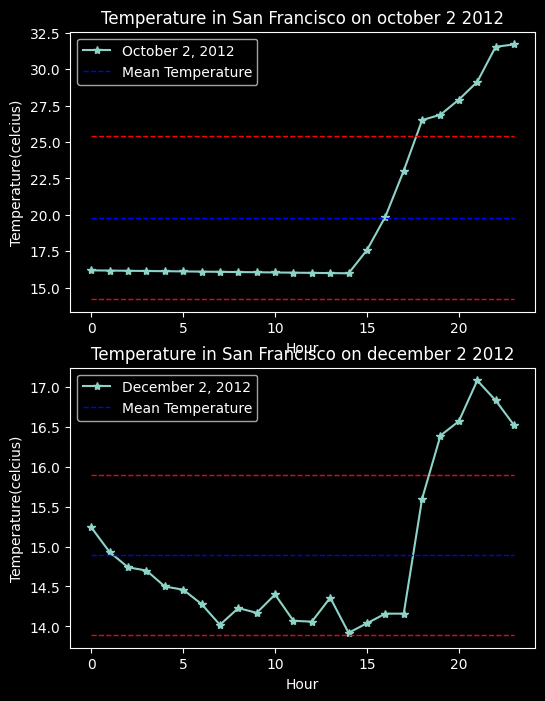

In [ ]:
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(6,8))
component_index=range(0,len(t1))
ax1.plot(component_index,t1,marker='*')
ax1.plot(component_index,[np.mean(t1)]*len(t1),color='blue',linestyle='dashed',linewidth=1,)
ax1.plot(component_index,[np.mean(t1)]*len(t1)- np.std(t1),color='red',linestyle='dashed',linewidth=1)
ax1.plot(component_index,[np.mean(t1)]*len(t1)+np.std(t1),color='red',linestyle='dashed',linewidth=1)
ax1.set_xlabel('Hour')
ax1.set_ylabel('Temperature(celcius)')
ax1.set_title('Temperature in San Francisco on october 2 2012')
ax1.legend(['October 2, 2012', 'Mean Temperature'])

ax2.plot(component_index,t2,marker='*')
ax2.plot(component_index,[np.mean(t2)]*len(t2),color='blue',linestyle='dashed',linewidth=1)
ax2.plot(component_index,[np.mean(t2)]*len(t2)- np.std(t2),color='red',linestyle='dashed',linewidth=1)
ax2.plot(component_index,[np.mean(t2)]*len(t2)+np.std(t2),color='red',linestyle='dashed',linewidth=1)
ax2.set_xlabel('Hour')
ax2.set_ylabel('Temperature(celcius)')
ax2.set_title('Temperature in San Francisco on december 2 2012')
ax2.legend(['December 2, 2012','Mean Temperature'])
plt.show()

In [ ]:
np.std(t1)
np.std(t2)

1.000147818935899

In [ ]:
np.mean(t1)
t_m=t1-np.mean(t1)
print(t_m)
v=np.mean(t_m**2)
print(v)
s=np.sqrt(v)
print(s)
z=t_m/s
print(z)

[-3.62706017 -3.64143487 -3.65580958 -3.67018428 -3.68455898 -3.69893368
 -3.71330838 -3.72768308 -3.74205778 -3.75643248 -3.77080718 -3.78518188
 -3.79955658 -3.81393128 -3.82830598 -2.22830598  0.06169402  3.22169402
  6.70169402  7.07169402  8.11169402  9.33169402 11.74169402 11.90169402]
31.29833295765241
5.594491304636411
[-0.64832707 -0.65089651 -0.65346595 -0.65603539 -0.65860483 -0.66117427
 -0.6637437  -0.66631314 -0.66888258 -0.67145202 -0.67402146 -0.6765909
 -0.67916033 -0.68172977 -0.68429921 -0.39830359  0.01102764  0.57586898
  1.19790945  1.26404594  1.44994309  1.66801475  2.09879565  2.12739521]


---

Mean-center daily temperature vectors for San Francisco for October 2, 2012 and December 2, 2012 and make component plots of those vectors

---

1.1842378929335002e-15
0.0


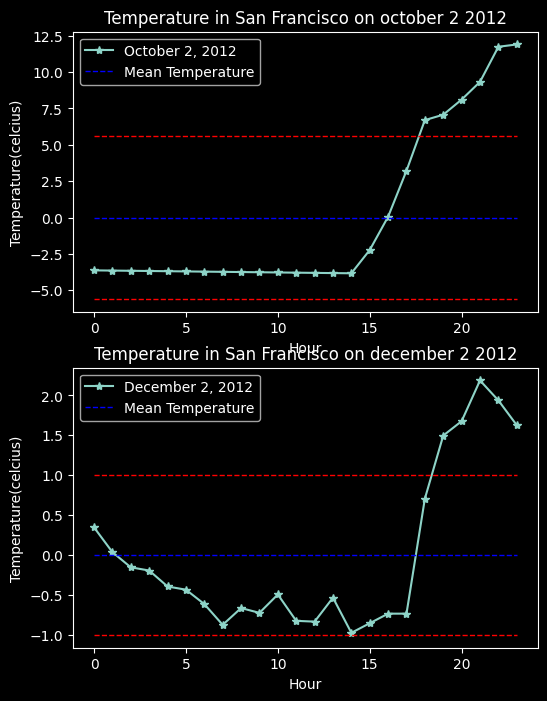

In [ ]:
# Mean-centered temperature vector for San Francisco for 2012-10-02
t1_mc = t1-np.mean(t1)
print(np.mean(t1_mc))

# Mean-centered temperature vector for San Francisco for 2012-12-02
t2_mc =t2-np.mean(t2)
print(np.mean(t2_mc))

# Plot mean-centered temperature vectors for both days
fig1,(ax3,ax4)=plt.subplots(2,1,figsize=(6,8))
component_index=range(0,len(t1))
ax3.plot(component_index,t1_mc,marker='*')
ax3.plot(component_index,[np.mean(t1_mc)]*len(t1),color='blue',linestyle='dashed',linewidth=1,)
ax3.plot(component_index,[np.mean(t1_mc)]*len(t1)- np.std(t1),color='red',linestyle='dashed',linewidth=1)
ax3.plot(component_index,[np.mean(t1_mc)]*len(t1)+np.std(t1),color='red',linestyle='dashed',linewidth=1)
ax3.set_xlabel('Hour')
ax3.set_ylabel('Temperature(celcius)')
ax3.set_title('Temperature in San Francisco on october 2 2012')
ax3.legend(['October 2, 2012', 'Mean Temperature'])

ax4.plot(component_index,t2_mc,marker='*')
ax4.plot(component_index,[np.mean(t2_mc)]*len(t2),color='blue',linestyle='dashed',linewidth=1)
ax4.plot(component_index,[np.mean(t2_mc)]*len(t2)- np.std(t2),color='red',linestyle='dashed',linewidth=1)
ax4.plot(component_index,[np.mean(t2_mc)]*len(t2)+np.std(t2),color='red',linestyle='dashed',linewidth=1)
ax4.set_xlabel('Hour')
ax4.set_ylabel('Temperature(celcius)')
ax4.set_title('Temperature in San Francisco on december 2 2012')
ax4.legend(['December 2, 2012','Mean Temperature'])
plt.show()

---

Standardize daily temperature vectors for San Francisco for October 2, 2012 and December 2, 2012 and make component plots of those vectors

---

[-0.64832707 -0.65089651 -0.65346595 -0.65603539 -0.65860483 -0.66117427
 -0.6637437  -0.66631314 -0.66888258 -0.67145202 -0.67402146 -0.6765909
 -0.67916033 -0.68172977 -0.68429921 -0.39830359  0.01102764  0.57586898
  1.19790945  1.26404594  1.44994309  1.66801475  2.09879565  2.12739521]
[ 0.34703204  0.03707785 -0.15289407 -0.19288815 -0.39285859 -0.43285268
 -0.61282608 -0.87278765 -0.66281869 -0.72280982 -0.49284382 -0.82279504
 -0.83279356 -0.5328379  -0.97277287 -0.85279061 -0.73280834 -0.73280834
  0.70697883  1.49686207  1.67683547  2.18676009  1.93679704  1.62684286]


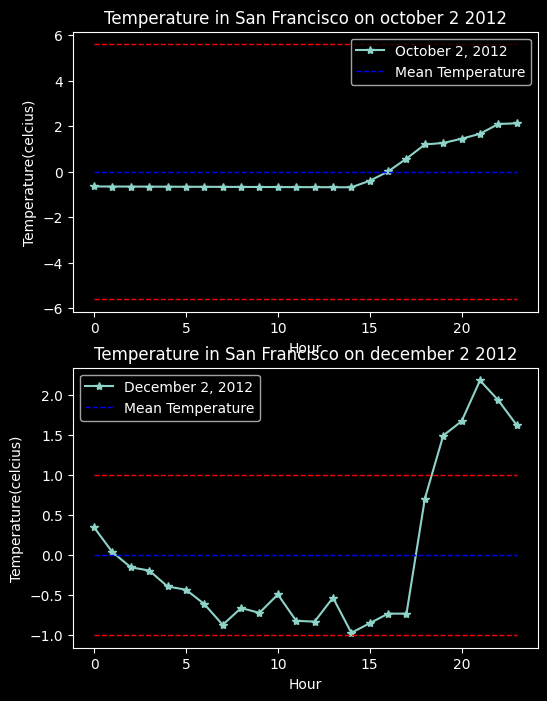

In [ ]:
# Standardized temperature vector for San Francisco for 2012-10-02
z1 = t1_mc/np.std(t1)
print(z1)

# Mean-centered temperature vector for San Francisco for 2012-12-02
z2 = t2_mc/np.std(t2)
print(z2)

# Plot standardized temperature vectors for both days
fig1,(ax3,ax4)=plt.subplots(2,1,figsize=(6,8))
component_index=range(0,len(t1))
ax3.plot(component_index,z1,marker='*')
ax3.plot(component_index,[np.mean(t1_mc)]*len(t1),color='blue',linestyle='dashed',linewidth=1,)
ax3.plot(component_index,[np.mean(t1_mc)]*len(t1)- np.std(t1),color='red',linestyle='dashed',linewidth=1)
ax3.plot(component_index,[np.mean(t1_mc)]*len(t1)+np.std(t1),color='red',linestyle='dashed',linewidth=1)
ax3.set_xlabel('Hour')
ax3.set_ylabel('Temperature(celcius)')
ax3.set_title('Temperature in San Francisco on october 2 2012')
ax3.legend(['October 2, 2012', 'Mean Temperature'])

ax4.plot(component_index,z2,marker='*')
ax4.plot(component_index,[np.mean(t2_mc)]*len(t2),color='blue',linestyle='dashed',linewidth=1)
ax4.plot(component_index,[np.mean(t2_mc)]*len(t2)- np.std(t2),color='red',linestyle='dashed',linewidth=1)
ax4.plot(component_index,[np.mean(t2_mc)]*len(t2)+np.std(t2),color='red',linestyle='dashed',linewidth=1)
ax4.set_xlabel('Hour')
ax4.set_ylabel('Temperature(celcius)')
ax4.set_title('Temperature in San Francisco on december 2 2012')
ax4.legend(['December 2, 2012','Mean Temperature'])
plt.show()

---

Identify outliers in the daily temperature vectors for San Francisco for October 2, 2012 and December 2, 2012

---

In [ ]:
# Z-score threshold
threshold = 2.0 #beyond which values are outliers

# Find outlier hours for z1
outlier_hours_z1 = [i for i, z in enumerate(z1) if z > threshold]
if outlier_hours_z1:
  print(f'On 2012-10-02, outlier hours were: {outlier_hours_z1}')

# Find outlier hours for z2
outlier_hours_z2 = [i for i, z in enumerate(z2) if z > threshold]
if outlier_hours_z2:
  print(f'On 2012-12-02, outlier hours were: {outlier_hours_z2}')

On 2012-10-02, outlier hours were: [22, 23]
On 2012-12-02, outlier hours were: [21]


In [ ]:
threshold=2.0
for i in range(len(z1)):
  if z1[i]>threshold:
    print(i)
print("-------------------------")
for i in range(len(z2)):
  if z2[i]>threshold:
    print(i)

22
23
-------------------------
21


In [ ]:
print(np.where(np.abs(z1)>threshold))
print(np.where(np.abs(z2)>threshold))

(array([22, 23]),)
(array([21]),)


---

Download popular stock prices data from Yahoo Finance for the range August 1, 2024 to August 1, 2025

---

In [4]:
# Download stock price data of popular companies
stocks = ['AAPL', 'MSFT', 'GOOG', 'TSLA', 'JNJ', 'JPM', 'NVDA', 'AMZN', 'META', 'XOM']
dfstock = yf.download(stocks, start = "2024-08-01", end = "2025-08-01")
dfstock = dfstock.xs('Close', axis = 1, level = 0)
dfstock.dropna(inplace = True)
dfstock.head()


/tmp/ipython-input-3778673071.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  dfstock = yf.download(stocks, start = "2024-08-01", end = "2025-08-01")
[*********************100%***********************]  10 of 10 completed


Ticker,AAPL,AMZN,GOOG,JNJ,JPM,META,MSFT,NVDA,TSLA,XOM
Date,,,,,,,,,,
2024-08-01,217.097183,184.070007,171.626068,154.552963,203.392670,496.041473,413.257019,109.175514,216.860001,111.967537
2024-08-02,218.588501,167.899994,167.595413,157.802460,194.766373,486.474274,404.716614,107.236115,207.669998,111.900520
2024-08-05,208.059738,161.020004,159.872498,155.024048,190.619492,474.106598,391.499847,100.418274,198.880005,109.880409
2024-08-06,206.031525,161.929993,159.772964,152.832077,195.940002,492.403961,395.918671,104.217079,200.639999,109.296417
2024-08-07,208.606567,162.770004,159.981949,152.764786,195.998688,487.251587,394.749542,98.878769,191.759995,110.751656


---

Compute daily log returns as $\log\left(\frac{P_t}{P_{t-1}}\right)$ where $P_t$ is stock price today and $P_{t-1}$ is stock price yesterday. For each company, its log return values can be treated as a vector.

In [ ]:
dfstock.columns

Index(['AAPL', 'AMZN', 'GOOG', 'JNJ', 'JPM', 'META', 'MSFT', 'NVDA', 'TSLA',
       'XOM'],
      dtype='object', name='Ticker')

In [5]:
# Compute log returns
log_returns = np.log(dfstock / dfstock.shift(1)).dropna()
log_returns.head()
np.exp(-0.0919)

0.9121963646207227

---

The risk or volatility associated with a stock can be quantified by the standard deviation of the log returns of that stock.

First, compute the volatility in the log return of TSLA. Then, compute the volatility in the log returns of the all the stocks and plot them in a bar plot in descending order.

---

In [ ]:
type(log_returns['TSLA'])

pandas.core.series.Series

Volatility in the log returns of TSLA = 0.04491792081038267
Volatility in the log returns of all stocks =
 Ticker
TSLA    0.045008
NVDA    0.034123
META    0.022929
AMZN    0.021501
AAPL    0.019815
GOOG    0.019647
JPM     0.017553
MSFT    0.015702
XOM     0.015349
JNJ     0.012190
dtype: float64


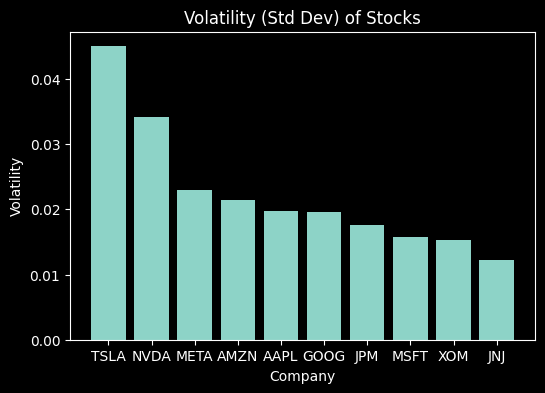

In [ ]:
 # Compute standard deviation a.k.a. volatility a.k.a. risk of TSLA
a = log_returns['TSLA'].values
volatility_TSLA = np.std(a)
print(f'Volatility in the log returns of TSLA = {volatility_TSLA}')

# All stocks volatilities
volatilities = log_returns.std()
volatilities=volatilities.sort_values(ascending=False)
print(f'Volatility in the log returns of all stocks =\n {volatilities}')

# Plot volatilities
fig, ax = plt.subplots(1, 1, figsize = (6, 4))
ax.bar(volatilities.index,volatilities.values)
ax.set_xlabel('Company')

ax.set_ylabel('Volatility')
ax.set_title('Volatility (Std Dev) of Stocks');


---

The covariance between two vectors is a measure of how the two vectors co-vary about their respective means. It is calculated as the average dot product of their mean-centered versions. If $\mathbf{a}_{mc}$ and $\mathbf{b}_{mc}$ represent the mean-centered versions of vectors $\mathbf{a}$ and $\mathbf{b},$ respectively, then the covariance between $\mathbf{a}$ and $\mathbf{b}$ is denoted and calculated as $$\text{cov}(\mathbf{a},\mathbf{b}) = \frac{1}{n}\times\left(\mathbf{a}_{mc}\cdot\mathbf{b}_{mc}\right).$$

In the component plot below of mean-centered heart rate and blood pressure values, it can be seen that the heart rates and blood pressures of the patients are covarying similarly; that is, as the heart rate increases or decreases w.r.t. the average heart rate from one patient to another, the blood pressure also typically does the same w.r.t the average blood pressure.

![Covariance](https://1drv.ms/i/c/37720f927b6ddc34/IQTLFeKh-TzhSpSSm3swzRsaAarPH-HPV-j9tmHPV7eiDuY?width=375&height=580)

Calculate the covariance between the log returns of AAPL and AMZN. Does it indicate that those stocks co-vary similarly?

Make component plots of the log returns of AAPL and AMZN. Do you see the stocks co-varying similarly?

Modify the component plots to show the mean-centered log returns. Now do you see the stocks co-varying similarly?



---

Covariance between AAPL and AMZN log returns = [[0.00039262 0.00024667]
 [0.00024667 0.00046231]]


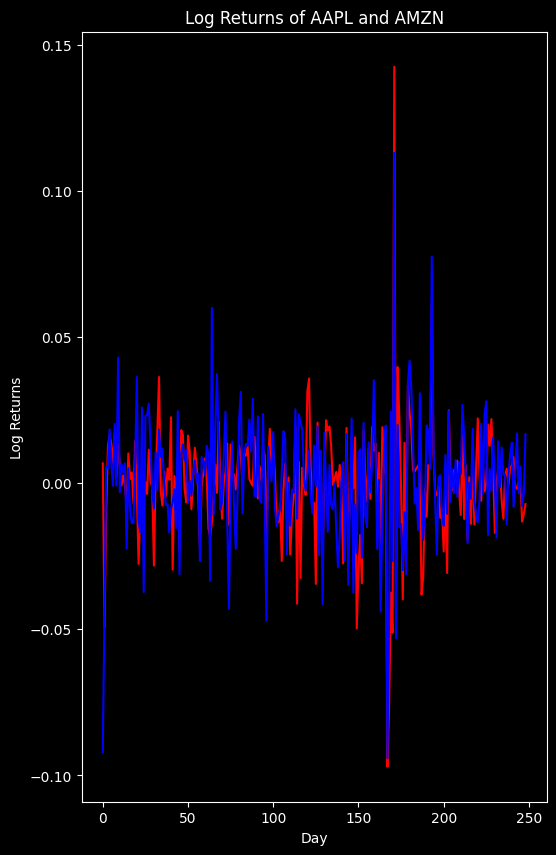

In [ ]:
# Covariance between log returns of APPL and AMZN
a = log_returns['AAPL'].values
a_mc = a-np.mean(a)
b = log_returns['AMZN'].values
b_mc = b-np.mean(b)
#cov = np.mean(a_mc*b_mc)
cov=np.cov(a,b)
print(f'Covariance between AAPL and AMZN log returns = {cov}');

# Component plot of the log returns of AAPL and AMZN
fig, ax = plt.subplots(1, 1, figsize = (6, 10))
component_index = range(0, len(log_returns))
ax.plot(component_index, a, color = 'red')
ax.plot(component_index, b, color = 'blue')
ax.set_xlabel('Day')
ax.set_ylabel('Log Returns')
ax.set_title( 'Log Returns of AAPL and AMZN');

---

Compute the covariance between all pairs of log returns. The resulting matrix, denoted as $\pmb{\Sigma}$ is called the covariance matrix.

From that matrix, are you able to identify stocks that co-vary?

---

In [ ]:
# Covariance matrix matrix of log returns
covmatrix = log_returns.cov()
print(covmatrix)

Ticker      AAPL      AMZN      GOOG       JNJ       JPM      META      MSFT  \
Ticker                                                                         
AAPL    0.000393  0.000247  0.000193  0.000021  0.000164  0.000250  0.000175   
AMZN    0.000247  0.000462  0.000272 -0.000039  0.000211  0.000364  0.000242   
GOOG    0.000193  0.000272  0.000386 -0.000032  0.000140  0.000242  0.000167   
JNJ     0.000021 -0.000039 -0.000032  0.000149  0.000019 -0.000047 -0.000027   
JPM     0.000164  0.000211  0.000140  0.000019  0.000308  0.000188  0.000123   
META    0.000250  0.000364  0.000242 -0.000047  0.000188  0.000526  0.000244   
MSFT    0.000175  0.000242  0.000167 -0.000027  0.000123  0.000244  0.000247   
NVDA    0.000299  0.000426  0.000340 -0.000108  0.000249  0.000439  0.000335   
TSLA    0.000428  0.000514  0.000464 -0.000030  0.000364  0.000498  0.000328   
XOM     0.000122  0.000077  0.000058  0.000039  0.000106  0.000080  0.000035   

Ticker      NVDA      TSLA       XOM  


---

The correlation coefficient between two vectors $\mathbf{a}$ and $\mathbf{c}$ is a normalized measure (between -1 and 1) of their covariance which is denoted and calculated as $$\text{cor}(\mathbf{a},\mathbf{b}) = \frac{\left(\mathbf{a}_{mc}\cdot\mathbf{b}_{mc}\right)}{\lVert \mathbf{a}_{mc}\rVert_2\lVert\mathbf{b}_{mc}\rVert_2}.$$ Note that the cauchy-Schwarz inequality guarantees that the above quantity is between -1 and 1.

If the correlation coefficient is close to 1, then as one vector's components increase, the other vectors components also increase typically along a straight line. If the correlation coefficient is close to -1, then as one vector's components increase, the other vectors components decrease typically along a straight line.

Compute the correlation coefficient between the log returns of AAPL and AMZN. Does it indicate that those stocks co-vary similarly?

Make a scatter plot of the log returns of AAPL and AMZN. Does the plot indicate that the two stocks co-vary similarly?

---

Correation coefficient between AAPL and AMZN log returns = [[1.         0.57899395]
 [0.57899395 1.        ]]
Covariance between AAPL and AMZN log returns = [[0.00039262 0.00024668]
 [0.00024668 0.00046231]]


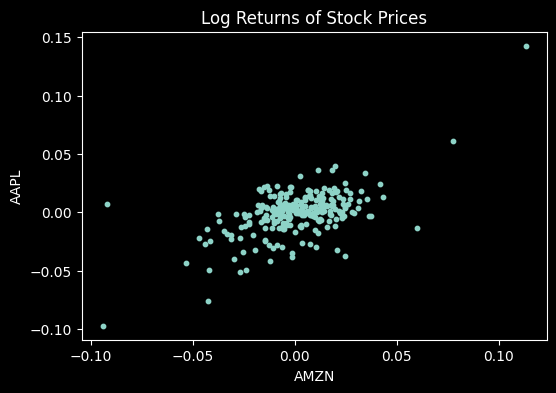

In [ ]:
# Correlation between APPL and AMZN)
corr = np.corrcoef(a, b)
print(f'Correation coefficient between AAPL and AMZN log returns = {corr}')
print(f'Covariance between AAPL and AMZN log returns = {np.cov(a,b)}');
# Scatter plot of the log returns of AAPL and AMZN
fig, ax = plt.subplots(1, 1, figsize = (6, 4))
ax.scatter(log_returns['AMZN'], log_returns['AAPL'], s=10)
ax.set_xlabel('AMZN')
ax.set_ylabel('AAPL')
ax.set_title('Log Returns of Stock Prices');

---

Compute the correlation coefficient between all pairs of log returns and visualize the resulting correlation matrix. From that, identify stocks that co-vary typically.

---

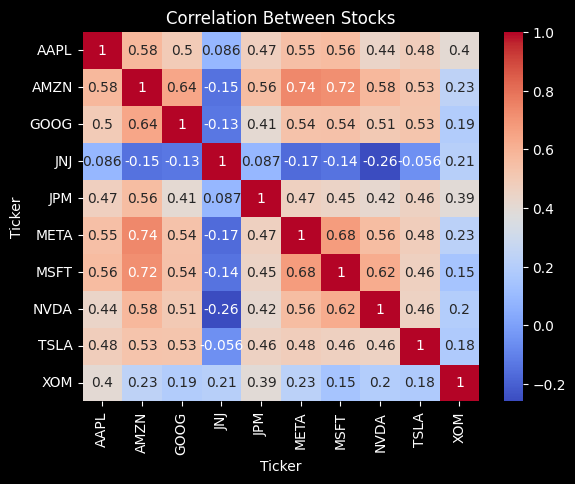

In [ ]:
# Correlation matrix of log returns
corrmatrix = log_returns.corr()
#print(corrmatrix)
sns.heatmap(corrmatrix, annot=True, cmap='coolwarm');
plt.title("Correlation Between Stocks")
plt.show()

---

The average log return (or simply return) associated with a stock (AAPL) is simply the average or mean of the log returns of the that stock. For example, if we denote the log returns of AAPL as an $n$-vector $\mathbf{a},$ then its average log return in pen & paper can be written as $$\frac{1}{n}\times\left(a_1+a_2+\cdots+a_n\right) = \frac{1}{n}\times\left(\pmb{1}\cdot\mathbf{a}\right),$$ where $\pmb{1}$ is an $n$-vector whose elements are all equal to ones.

For a blended investment on the 10 stocks (called a portfolio) with weights that add up to 1 and represented as the vector $$\mathbf{w}=\begin{bmatrix}w_1\\w_2\\w_3\\\vdots\\w_{10}\end{bmatrix},$$
- the averate return can be shown to be $\mathbf{w}\cdot\mathbf{r},$ where $\mathbf{r}$ is the vector of average returns of all the 10 stocks;
- the overall risk (or simply risk) in the portfolio is $\mathbf{w}\cdot\left(\pmb{\Sigma}\mathbf{w}\right),$ which takes into account the individual volatility of each stock and their co-movement w.r.t. the other stocks.

Try to come up with a portfolio (that is, values for the components of the weights vector $\mathbf{w})$ that results in the best return-to-risk ratio. The best return-to-risk ratio is also referred to as the sharpe ratio.

---

In [ ]:
# Optimizing portfolio
print(np.mean(log_returns['AAPL']))
#  + 0.5 *np.mean(log_returns['AMZN']))
#print(np.std(log_returns['AAPL']))

-0.00018478164203919044


In [ ]:
# Average log returns for all stocks
average_log_returns = log_returns.mean()
print(f'Average log returns of all stocks:\n {average_log_returns}')

Average log returns of all stocks:
 Ticker
AAPL   -0.000185
AMZN    0.000966
GOOG    0.000468
JNJ     0.000227
JPM     0.001510
META    0.001784
MSFT    0.001019
NVDA    0.001960
TSLA    0.001413
XOM    -0.000049
dtype: float64


In [ ]:
r=log_returns.mean().values
w=np.array([0.05,0.05,0.05,0.3,0.05,0.05,0.05,0.3,0.05,0.05])
product=(np.dot(r,w))
covmatrix =log_returns.cov().values

risk =(np.dot(w.T, np.dot(covmatrix, w)))
print(product/risk)

4.431228910833574


(a) rms(a).
(b) avg(b).
(c) avg(−3b).
(d) std(a).
(e) std(−3a).
(f) The correlation coefficient between a and b.
(g) The distance between a and b.
(h) The angle between a and b.

In [ ]:
a = torch.tensor([0, -1, -2], dtype=torch.float64)
b = torch.tensor([0, 1, 2], dtype=torch.float64)

# Calculate the Root Mean Square (RMS) of a
root_mean = torch.sqrt(torch.mean(a**2))
print(f'rms(a) = {root_mean}')
print("----------------------------")
# Calculate the average of b
print(f'avg(b)= {torch.mean(b)}')
print("----------------------------")
# Calculate the average of -3b
print(f'avg(-3b) = {-3*torch.mean(b)}') #broadcasting
print("----------------------------")

# Calculate the standard deviation of a
print(f'std(a) = {torch.std(a)}')
print("----------------------------")

# Calculate the standard deviation of -3a
print(f'std(-3a) = {torch.std(-3*a)}')

print("----------------------------")
# Calculate the distance between a and b
print(f'The distance between a and b = {torch.norm(a - b)}')
print("----------------------------")
# Calculate the angle between a and b
ab = torch.dot(a, b)
norm_a = torch.norm(a)
norm_b = torch.norm(b)
cos_theta = ab / (norm_a * norm_b)
angle_ab= torch.acos(cos_theta)
print(f'(The angle between a and b (radians) = {angle_ab}')


rms(a) = 1.2909944487358056
----------------------------
avg(b)= 1.0
----------------------------
avg(-3b) = -3.0
----------------------------
std(a) = 1.0
----------------------------
std(-3a) = 3.0
----------------------------
The distance between a and b = 4.47213595499958
----------------------------
(The angle between a and b (radians) = 3.1415926325163688


In [ ]:
a = torch.tensor([0, -1, -2], dtype=torch.float64)
a_mc=a-torch.mean(a)
print(a_mc)
var=torch.mean(a_mc**2)
s=torch.sqrt(var)
print(s)

tensor([ 1.,  0., -1.], dtype=torch.float64)
tensor(0.8165, dtype=torch.float64)


In [ ]:
np.mean(t1)
t_m=t1-np.mean(t1)
print(t_m)
v=np.mean(t_m**2)
print(v)
s=np.sqrt(v)
print(s)
z=t_m/s
print(z)

In [ ]:
np.sqrt(2/3)

0.816496580927726

In [ ]:
a = np.array([0, -1, -2])
np.std(a)


0.816496580927726

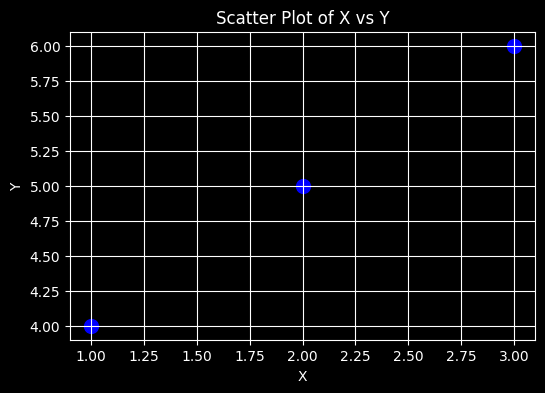

In [ ]:
import matplotlib.pyplot as plt

# Data
X = [1, 2, 3]
Y = [4, 5, 6]

# Create scatter plot
plt.figure(figsize=(6, 4))
plt.scatter(X, Y, color='blue', s=100)
plt.title('Scatter Plot of X vs Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()


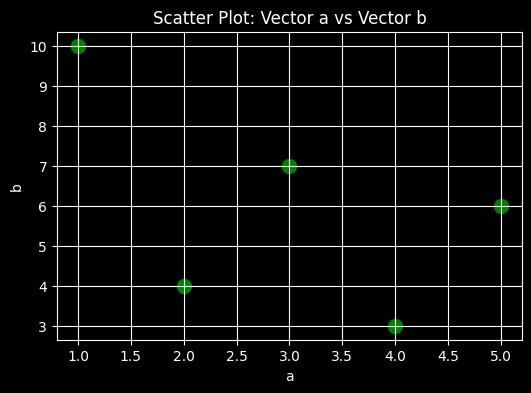

In [ ]:
import matplotlib.pyplot as plt

# Vectors
a = [1, 2, 3, 4, 5]
b = [10, 4, 7, 3, 6]

# Create scatter plot
plt.figure(figsize=(6, 4))
plt.scatter(a, b, color='green', s=100)
plt.title('Scatter Plot: Vector a vs Vector b')
plt.xlabel('a')
plt.ylabel('b')
plt.grid(True)
plt.show()


In [ ]:
import torch
import torch.optim as optim
import numpy as np

# Convert data to PyTorch tensors
r_tensor = torch.tensor(r, dtype=torch.float64)
covmatrix_tensor = torch.tensor(covmatrix, dtype=torch.float64)
# Initialize weights with requires_grad=True for optimization
w_tensor = torch.tensor(w, dtype=torch.float64, requires_grad=True)

# Define the optimization function
def optimize_portfolio(weights, mean_returns, cov_matrix):
    # Ensure weights are non-negative and sum to 1
    weights = torch.relu(weights)  # Non-negativity constraint
    weights = weights / torch.sum(weights) # Sum-to-one constraint

    # Calculate portfolio return
    portfolio_return = torch.dot(mean_returns, weights)

    # Calculate portfolio risk
    cov_w = torch.matmul(cov_matrix, weights)
    portfolio_risk = torch.dot(weights, cov_w)

    # Calculate Sharpe ratio
    # Add a small epsilon to the risk to avoid division by zero
    sharpe_ratio = portfolio_return / (torch.sqrt(portfolio_risk) + 1e-8)

    # Loss function (negative Sharpe ratio)
    loss = -sharpe_ratio

    return portfolio_return, portfolio_risk, sharpe_ratio, loss, weights

# Set up the optimization loop
optimizer = optim.Adam([w_tensor], lr=0.01) # Using Adam optimizer

# Run the optimization
num_iterations = 1000
for i in range(num_iterations):

    optimizer.zero_grad() # Clear gradients
    portfolio_return, portfolio_risk, sharpe_ratio, loss, updated_weights = optimize_portfolio(w_tensor, r_tensor, covmatrix_tensor)
    loss.backward() # Backpropagate the loss
    optimizer.step() # Update weights

# Apply final constraints after optimization
optimized_weights = torch.relu(w_tensor)
optimized_weights = optimized_weights / torch.sum(optimized_weights)

# Calculate final metrics with optimized weights
final_return, final_risk, final_sharpe_ratio, _, _ = optimize_portfolio(optimized_weights, r_tensor, covmatrix_tensor)

# Present the optimized portfolio
print(f'Optimized Weights: {optimized_weights.detach().numpy()}')
print(f'Optimized Portfolio Return: {final_return.item()}')
print(f'Optimized Portfolio Risk: {final_risk.item()}')
print(f'Optimized Sharpe Ratio: {final_sharpe_ratio.item()}')

Optimized Weights: [0.         0.         0.         0.2642638  0.39568446 0.25440703
 0.04037435 0.04527036 0.         0.        ]
Optimized Portfolio Return: 0.001241250649719763
Optimized Portfolio Risk: 0.00015695580649929255
Optimized Sharpe Ratio: 0.09907645267751515


In [ ]:
import torch

# Example input
log_returns = torch.randn(365, 10)   # (T, N) fake returns
r = log_returns.mean(dim=0)          # mean returns, shape (N,)
covmatrix = torch.cov(log_returns.T) # covariance matrix, shape (N,N)

# Parameter to optimize
w = torch.nn.Parameter(torch.ones(r.shape[0]) / r.shape[0])  # start equal weights

optimizer = torch.optim.Adam([w], lr=0.05)

# Projection onto simplex function
def project_to_simplex(v):
    """
    Project v onto the probability simplex (non-negative, sum=1).
    Ref: Wang & Carreira-Perpinan (2013)
    """
    # Sort in descending order
    u, _ = torch.sort(v, descending=True)
    cssv = torch.cumsum(u, dim=0)
    rho = torch.nonzero(u * torch.arange(1, len(u)+1, device=v.device) > (cssv - 1), as_tuple=False).max()
    theta = (cssv[rho] - 1) / (rho.item() + 1.0)
    w_proj = torch.clamp(v - theta, min=0)
    return w_proj

# Training loop
for step in range(1000):
    optimizer.zero_grad()

    # Portfolio return & risk
    port_return = torch.dot(w, r)
    port_risk   = torch.dot(w, torch.mv(covmatrix, w))

    # Objective
    loss = -(port_return / port_risk)

    loss.backward()
    optimizer.step()

    # Project weights to simplex
    with torch.no_grad():
        w.copy_(project_to_simplex(w))

    if step % 100 == 0:
        sharpe = port_return.item() / port_risk.item()
        print(f"Step {step}: Loss={loss.item():.6f}, Return={port_return.item():.6f}, Risk={port_risk.item():.6f}, SharpeRatio={sharpe:.6f}")

# Final optimized weights
final_w = w.detach().numpy()
print("Optimized weights:", final_w)


Step 0: Loss=0.169226, Return=-0.018236, Risk=0.107760, SharpeRatio=-0.169226
Step 100: Loss=-0.119585, Return=0.046593, Risk=0.389619, SharpeRatio=0.119585
Step 200: Loss=-0.119572, Return=0.046619, Risk=0.389880, SharpeRatio=0.119572
Step 300: Loss=-0.119572, Return=0.046619, Risk=0.389881, SharpeRatio=0.119572
Step 400: Loss=-0.119572, Return=0.046619, Risk=0.389881, SharpeRatio=0.119572
Step 500: Loss=-0.119572, Return=0.046619, Risk=0.389881, SharpeRatio=0.119572
Step 600: Loss=-0.119572, Return=0.046619, Risk=0.389881, SharpeRatio=0.119572
Step 700: Loss=-0.119572, Return=0.046619, Risk=0.389880, SharpeRatio=0.119572
Step 800: Loss=-0.119572, Return=0.046619, Risk=0.389880, SharpeRatio=0.119572
Step 900: Loss=-0.119572, Return=0.046619, Risk=0.389880, SharpeRatio=0.119572
Optimized weights: [0.00879597 0.         0.         0.         0.34958297 0.
 0.520298   0.         0.         0.12132306]


In [6]:
r=log_returns.mean().values
w=np.array([0.05,0.05,0.05,0.3,0.05,0.05,0.05,0.3,0.05,0.05])
product=(np.dot(r,w))
covmatrix =log_returns.cov().values

risk =(np.dot(w.T, np.dot(covmatrix, w)))
print(product/risk)

4.431228530829315


In [13]:
log_returns.mean().values

array([-1.84781924e-04,  9.65762784e-04,  4.68459649e-04,  2.26981499e-04,
        1.51016650e-03,  1.78388981e-03,  1.01906323e-03,  1.96022534e-03,
        1.41254618e-03, -4.89635394e-05])

In [26]:
#expected portfolio returns vector
r=torch.tensor(log_returns.mean().values,
               dtype=torch.float64)
#initial portfolio weights vector
w=torch.tensor(0.1*np.ones(10),dtype=torch.float64,requires_grad=True) #book keeping

#covariance matrix of risks
s=torch.tensor(np.array(log_returns.cov()),dtype=torch.float64)

#define optimizer
optimizer=torch.optim.Adam([w], lr=1e-02)

#loss function
def loss_fn(w):
  loss= -(torch.dot(w,r)/torch.dot(w, torch.matmul(s,w)))
  return loss
#optimization loop
num_epochs=10000
for epoch in range(num_epochs):
  #zero out the gradients
  optimizer.zero_grad()

  #loss calculation
  w_constrained=torch.softmax(w,dim=0)
  loss=loss_fn(w_constrained)


  #backward propogation and optimization
  loss.backward()
  optimizer.step()

  #print loss for every 1000 epochs
  if epoch %1000==0:
    print(f'Epoch {epoch} ,loss = {loss.item()}, sharp ratio= {torch.dot(w,r)/torch.dot(w, torch.matmul(s,w))}')


#print the optimized portfolio weights vector
w=torch.softmax(w,dim=0)
print(w)



Epoch 0 ,loss = -3.778577873693799, sharp ratio= 4.074040155447203
Epoch 1000 ,loss = -9.524343142246654, sharp ratio= 0.06090123525712288
Epoch 2000 ,loss = -9.55488844168035, sharp ratio= 0.07552882497800857
Epoch 3000 ,loss = -9.5620924297677, sharp ratio= 0.07874541957384293
Epoch 4000 ,loss = -9.564881196379899, sharp ratio= 0.07944065166594666
Epoch 5000 ,loss = -9.566205200478889, sharp ratio= 0.07916969622418431
Epoch 6000 ,loss = -9.566902895732527, sharp ratio= 0.07842118908171612
Epoch 7000 ,loss = -9.567292494853612, sharp ratio= 0.0774008574343568
Epoch 8000 ,loss = -9.567517461590683, sharp ratio= 0.07621423423744506
Epoch 9000 ,loss = -9.567649954805798, sharp ratio= 0.07492373968065022
tensor([2.1168e-06, 2.1946e-06, 3.8793e-06, 4.5258e-01, 2.0600e-01, 1.1889e-01,
        1.9954e-01, 2.2979e-02, 3.1563e-06, 1.9336e-06], dtype=torch.float64,
       grad_fn=<SoftmaxBackward0>)


In [27]:
# print(w)
# print(torch.softmax(w,dim=0))
# #optimal sharp ratio
# w=torch.softmax(w,dim=0)
average_return= torch.dot(w,r)
overall_risk=torch.dot(w, torch.matmul(s,w))
print(f'sharp ratio= {average_return/overall_risk}')

sharp ratio= 9.567727413838602


In [ ]:
# Standardize the data
sc = StandardScaler() # create a standard scaler object
X_std = torch.tensor(sc.fit_transform(X), dtype = torch.float64)
print(f'The standardized data matrix:\n{X_std}')

# The one-hot encoded true output labels matrix
print(f'One-hot encoded true output labels matrx:\n{Y}')

# Calculate the raw scores using the standardized data matrix
# and the weights matrix
print(f'The weights matrix:\n{W}')
Z = torch.matmul(X_std, W)
print(f'The raw scores matrix:\n{Z}')

# Calculate the softmax-activated scores matrix
softmax = torch.nn.Softmax(dim = 1)
A = softmax(Z)
print(f'The softmax-activated raw scores matrix:\n{A}')

# Quantify the unhappiness w.r.t. the current set of weights
print(f'One-hot encoded true output labels matrix:{Y}')
print(f'Hadamard product of Y and A:{Y*A}')
print(torch.sum(Y*A, dim=1))
print(-torch.log(torch.sum(Y*A, dim=1)))
#print(torch.mean(-torch.log(torch.sum(Y*A, dim=1))))
# Calculate the average training loss
L = torch.mean(-torch.log(torch.sum(Y*A, dim=1)))
print(f'Average training loss = {L}')

In [39]:
# Patients data matrix
X = torch.tensor([[72, 120, 37.3, 104, 32.5],
                 [85, 130, 37.0, 110, 14],
                 [68, 110, 38.5, 125, 34],
                 [90, 140, 38.0, 130, 26],
                 [84, 132, 38.3, 146, 30],
                 [78, 128, 37.2, 102, 12]], dtype = torch.float64)
print(f'Patient data matrix X:\n {X}') #f-string in Python

# Weights matrix
W = torch.tensor([[-0.1, 0.5, 0.3],
                  [0.9, 0.3, 0.5],
                  [-1.5, 0.4, 0.1],
                  [0.1, 0.1, -1.0],
                  [-1.2, 0.5, -0.8]], dtype = torch.float64,requires_grad=True)
print(f'Weights matrix:\n {W}')

y = np.array(['non-diabetic',
              'diabetic',
              'non-diabetic',
              'pre-diabetic',
              'diabetic',
              'pre-diabetic'])

optimizer=torch.optim.Adam([W], lr=1e-02)

#loss function
def loss_fn(W):
  loss= torch.mean(-torch.log(torch.sum(Y*A, dim=1)))
  return loss

#optimization loop
num_epochs=100
for epoch in range(num_epochs):
  #zero out the gradients
  optimizer.zero_grad()

  #loss calculation
  loss=loss_fn(W)


  #backward propogation and optimization
  loss.backward()
  optimizer.step()

if epoch % 1000 == 0:
  print(f"Epoch {epoch}, Loss: {loss.item()}")

# Final weights after training
print(f"Optimized weights matrix W:\n{W}")


Patient data matrix X:
 tensor([[ 72.0000, 120.0000,  37.3000, 104.0000,  32.5000],
        [ 85.0000, 130.0000,  37.0000, 110.0000,  14.0000],
        [ 68.0000, 110.0000,  38.5000, 125.0000,  34.0000],
        [ 90.0000, 140.0000,  38.0000, 130.0000,  26.0000],
        [ 84.0000, 132.0000,  38.3000, 146.0000,  30.0000],
        [ 78.0000, 128.0000,  37.2000, 102.0000,  12.0000]],
       dtype=torch.float64)
Weights matrix:
 tensor([[-0.1000,  0.5000,  0.3000],
        [ 0.9000,  0.3000,  0.5000],
        [-1.5000,  0.4000,  0.1000],
        [ 0.1000,  0.1000, -1.0000],
        [-1.2000,  0.5000, -0.8000]], dtype=torch.float64, requires_grad=True)


RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

In [36]:
# #expected portfolio returns vector
# r=torch.tensor(log_returns.mean().values,
#                dtype=torch.float64)
# #initial portfolio weights vector
W=torch.tensor(O,dtype=torch.float64,requires_grad=True) #book keeping

# #covariance matrix of risks
# s=torch.tensor(np.array(log_returns.cov()),dtype=torch.float64)

#define optimizer
optimizer=torch.optim.Adam([W], lr=1e-02)

#loss function
def loss_fn(W):
  loss= torch.mean(-torch.log(torch.sum(Y*A, dim=1)))
  return loss
#optimization loop
num_epochs=100
for epoch in range(num_epochs):
  #zero out the gradients
  optimizer.zero_grad()

  #loss calculation
  loss=loss_fn(W)


  #backward propogation and optimization
  loss.backward()
  optimizer.step()

  #print loss for every 1000 epochs
  if epoch %10==0:
    print(f'Epoch {epoch} ,loss = {loss.item()}')


#print the optimized portfolio weights vector
W=torch.softmax(W,dim=0)
print(W)



/tmp/ipython-input-3376261085.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  W=torch.tensor(O,dtype=torch.float64,requires_grad=True) #book keeping


RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [38]:
import torch
from sklearn.preprocessing import StandardScaler

# Patient data matrix
X = torch.tensor([[72, 120, 37.3, 104, 32.5],
                  [85, 130, 37.0, 110, 14],
                  [68, 110, 38.5, 125, 34],
                  [90, 140, 38.0, 130, 26],
                  [84, 132, 38.3, 146, 30],
                  [78, 128, 37.2, 102, 12]], dtype=torch.float64)

# One-hot encoded true output labels matrix (example labels for 3 classes)
Y = torch.tensor([
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1],
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1]
], dtype=torch.float64)

# Standardize the data
sc = StandardScaler()
X_std = torch.tensor(sc.fit_transform(X), dtype=torch.float64)

# Initialize weights with requires_grad=True to optimize
W = torch.randn(5, 3, dtype=torch.float64, requires_grad=True)

# Define optimizer
optimizer = torch.optim.Adam([W], lr=1e-2)

# Softmax activation
softmax = torch.nn.Softmax(dim=1)

# Training loop
num_epochs = 10000
for epoch in range(num_epochs):
    optimizer.zero_grad()

    # Forward pass
    Z = torch.matmul(X_std, W)
    A = softmax(Z)

    # Current loss as you had it
    # Add small epsilon to avoid log(0)
    loss = torch.mean(-torch.log(torch.sum(Y * A, dim=1) + 1e-02))

    # Backward pass
    loss.backward()

    # Optimization step
    optimizer.step()

    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")

# Final weights after training
print(f"Optimized weights matrix W:\n{W}")


Epoch 0, Loss: 2.7719976195181526
Epoch 1000, Loss: 0.02490975739437562
Epoch 2000, Loss: 0.0006039075843391273
Epoch 3000, Loss: -0.005257351706584376
Epoch 4000, Loss: -0.007530029215744644
Epoch 5000, Loss: -0.008609049112006703
Epoch 6000, Loss: -0.009177778227245985
Epoch 7000, Loss: -0.00949554954519914
Epoch 8000, Loss: -0.009679202785343647
Epoch 9000, Loss: -0.009787481365166021
Optimized weights matrix W:
tensor([[  1.0864,   2.1815,  -2.5057],
        [ 10.4152,  -1.3199,  -0.9235],
        [ -1.4639, -11.1403,   5.5509],
        [ -9.7927,   8.2463,  -6.0438],
        [  7.4122,  -2.2014,  -7.2287]], dtype=torch.float64,
       requires_grad=True)


In [40]:
# Patients data matrix
X = torch.tensor([[72, 120, 37.3, 104, 32.5],
                 [85, 130, 37.0, 110, 14],
                 [68, 110, 38.5, 125, 34],
                 [90, 140, 38.0, 130, 26],
                 [84, 132, 38.3, 146, 30],
                 [78, 128, 37.2, 102, 12]], dtype = torch.float64)
print(f'Patient data matrix X:\n {X}') #f-string in Python

# Weights matrix
W = torch.tensor([[-0.1, 0.5, 0.3],
                  [0.9, 0.3, 0.5],
                  [-1.5, 0.4, 0.1],
                  [0.1, 0.1, -1.0],
                  [-1.2, 0.5, -0.8]], dtype = torch.float64,requires_grad=True)
print(f'Weights matrix:\n {W}')

y = np.array(['non-diabetic',
              'diabetic',
              'non-diabetic',
              'pre-diabetic',
              'diabetic',
              'pre-diabetic'])

y = y.reshape(-1, 1)
ohe = OneHotEncoder(sparse_output = False)
# Create the one-hot encoded true output labels matrix
Y = torch.tensor(ohe.fit_transform(y), dtype = torch.float64)
sc = StandardScaler() # create a standard scaler object
X_std = torch.tensor(sc.fit_transform(X), dtype = torch.float64)
print(f'The standardized data matrix:\n{X_std}')


# Define Optimizer
optimizer=torch.optim.Adam([W],lr=1e-02)

# Loss function
def loss_fn(W):
  Z=torch.matmul(X_std,W)
  A=softmax(Z)
  Y=torch.tensor(ohe.fit_transform(y), dtype = torch.float64)
  loss=torch.mean(-torch.log(torch.sum(Y*A, dim=1)))
  return loss

# Optimization loop
num_epochs=10000
for epoch in range(num_epochs):
  # Zero out the gradients
  optimizer.zero_grad()

  # Loss calculation
  loss=loss_fn(W)

  # Backward propagation
  loss.backward()
  optimizer.step()

  # Print the loss every 1000 epochs
  if epoch%1000 ==0:
    print(f'Epoch {epoch}, loss= {loss.item()}')

# Print the optimized portfolio weights vector
print(W)


Patient data matrix X:
 tensor([[ 72.0000, 120.0000,  37.3000, 104.0000,  32.5000],
        [ 85.0000, 130.0000,  37.0000, 110.0000,  14.0000],
        [ 68.0000, 110.0000,  38.5000, 125.0000,  34.0000],
        [ 90.0000, 140.0000,  38.0000, 130.0000,  26.0000],
        [ 84.0000, 132.0000,  38.3000, 146.0000,  30.0000],
        [ 78.0000, 128.0000,  37.2000, 102.0000,  12.0000]],
       dtype=torch.float64)
Weights matrix:
 tensor([[-0.1000,  0.5000,  0.3000],
        [ 0.9000,  0.3000,  0.5000],
        [-1.5000,  0.4000,  0.1000],
        [ 0.1000,  0.1000, -1.0000],
        [-1.2000,  0.5000, -0.8000]], dtype=torch.float64, requires_grad=True)
The standardized data matrix:
tensor([[-0.9799, -0.7019, -0.7238, -0.9871,  0.8920],
        [ 0.7186,  0.3509, -1.2449, -0.6050, -1.2374],
        [-1.5025, -1.7547,  1.3607,  0.3503,  1.0647],
        [ 1.3718,  1.4037,  0.4922,  0.6687,  0.1439],
        [ 0.5879,  0.5615,  1.0133,  1.6876,  0.6043],
        [-0.1960,  0.1404, -0.8975, -1